In [42]:
import numpy as np
import cv2
import os
import random

In [43]:
folder = 'data'

In [44]:
name = [0] * len(os.listdir(folder))
for idx, labels in enumerate(os.listdir(folder)):
    name[idx] = labels
def get_label(idx):
    return name[idx]

In [45]:
name

['abdu',
 'abrish',
 'amha',
 'bisrat',
 'gadi',
 'red',
 'samig',
 'sefi',
 'simon',
 'tg']

In [108]:
def train_train_split(images, labels):
    tweny_percent = int(len(images) * (0.2))
    return images[tweny_percent:], images[:tweny_percent], labels[tweny_percent:], labels[:tweny_percent]
    

In [109]:
Images, Labels = image_to_num(folder) #Extract the training images from the folders.
Images = np.array(Images)/255 #converting the list of images to numpy array and also normalize the the imafe
Labels = np.array(Labels)

In [165]:
width = 150
height = 150

In [182]:
def func(path):
    train_image_names = os.listdir(path)
    training_tensor   = np.ndarray(shape=(len(train_image_names), width*height), dtype=np.float64)
    for i in range(len(train_image_names)):
        img = cv2.imread(os.path.join(path, train_image_names[i]))
        img = cv2.resize(img,(150,150))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    return training_tensor
def get_mean_faces():
    mean_faces = []
    for fldr in os.listdir(folder):
        mean_face = np.zeros((1,width*height))
        training_tensor = func(os.path.join(folder, fldr))
        for i in training_tensor:
            mean_face = np.add(mean_face,i)
        mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()
        mean_faces.append(mean_face)
    return mean_faces
    

In [183]:
mean_faces = get_mean_faces()

In [184]:
len(mean_faces)

10

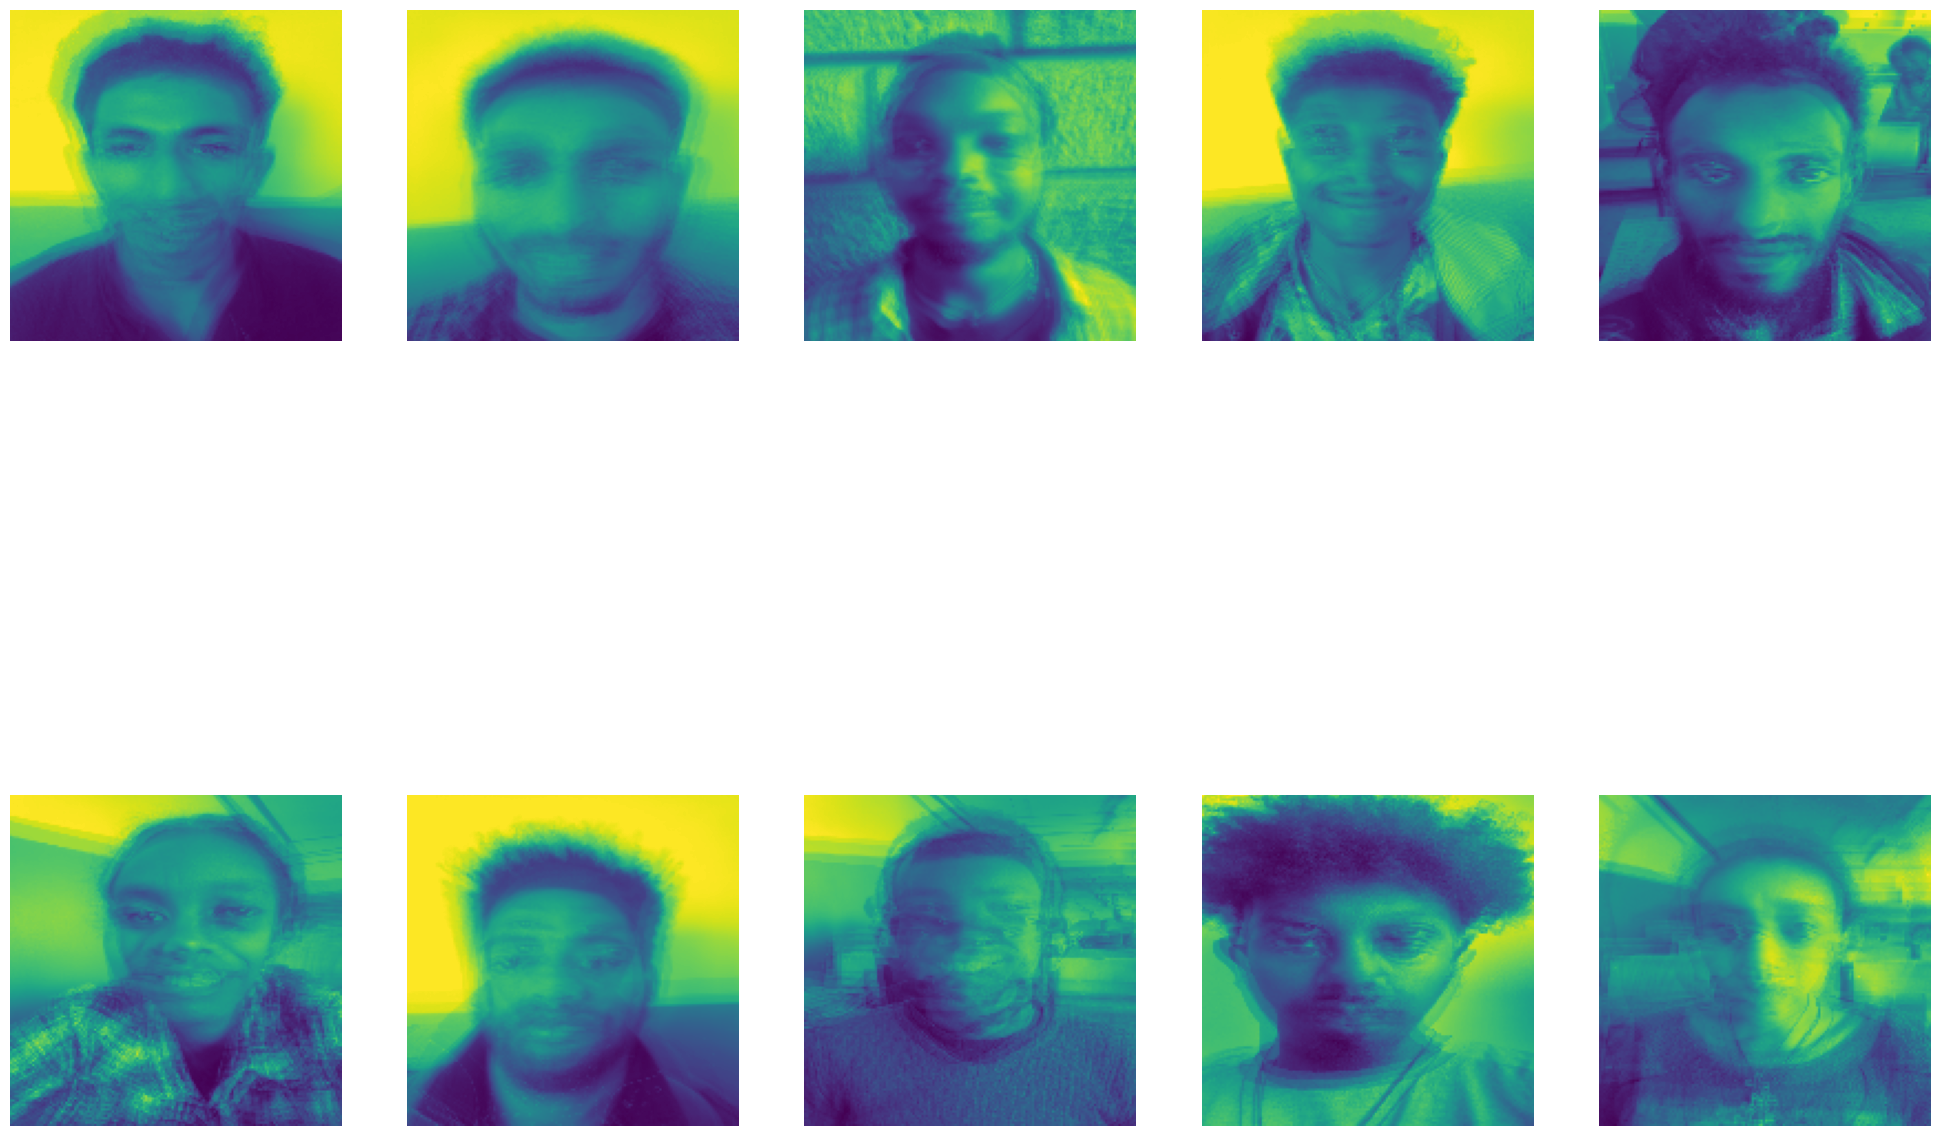

In [190]:
f,ax = plt.subplots(2, 5) 
f.subplots_adjust(0,0,3,3)
idx = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(mean_faces[idx].reshape(height, width))
        ax[i,j].axis('off')
        idx += 1

In [194]:
cur = os.listdir('data/abdu')
normalised_training_tensor = np.ndarray(shape=(len(cur), height*width))

for i in range(len(cur)):
    img = cv2.imread(os.path.join('data/abdu', cur[i]))
    img = cv2.resize(img,(150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalised_training_tensor[i] = np.subtract(img.reshape(height*width),mean_face[0])

In [199]:
cur_mean = np.zeros((1,width*height))

In [200]:
for i in normalised_training_tensor:
    cur_mean.add(mean_faces[0], i)
cur_mean = np.devide(cur_mean, 6).flatten()
cur_mean.reshape(height, width)
plt.imshow(cur_mean)

AttributeError: 'numpy.ndarray' object has no attribute 'add'

In [155]:
def substract_mean():
    cur_mean_faces = []
    normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))
    for i in range(len(train_image_names)):
        normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)
    return normalised_training_tensor

In [112]:
X_train, X_test, y_train, y_test = train_train_split(Images, Labels)

print(X_train.shape, X_test.shape)

(49, 150, 150) (12, 150, 150)


In [75]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [18]:
pca

PCA(n_components=150, whiten=True)

In [19]:
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


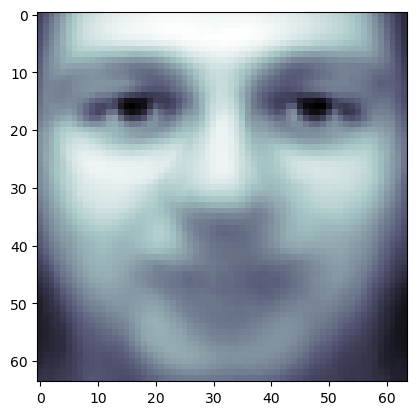

In [20]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [21]:
print(pca.components_.shape)

(150, 4096)


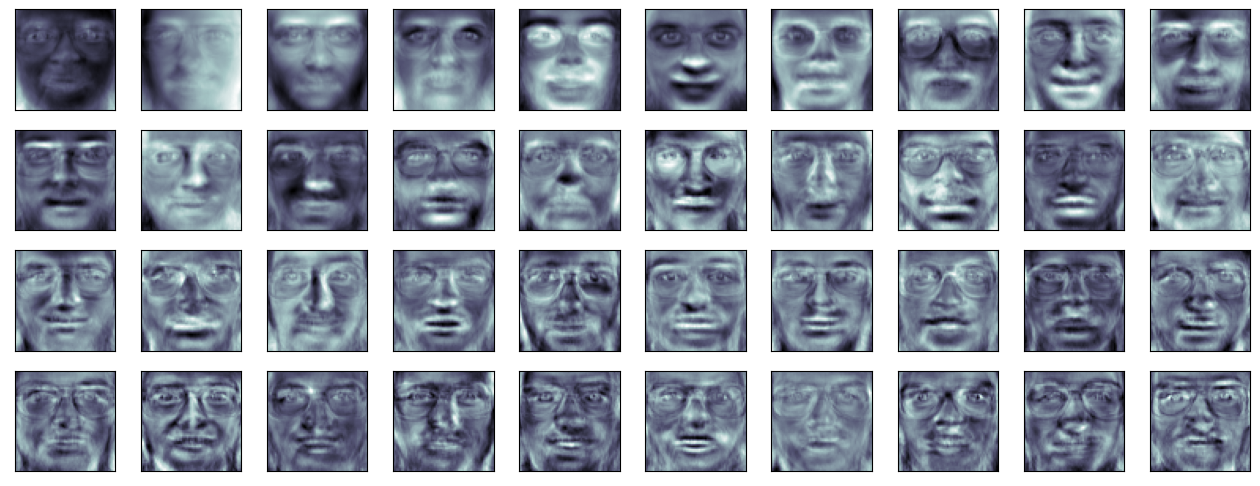

In [24]:
fig = plt.figure(figsize=(16, 6))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [26]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

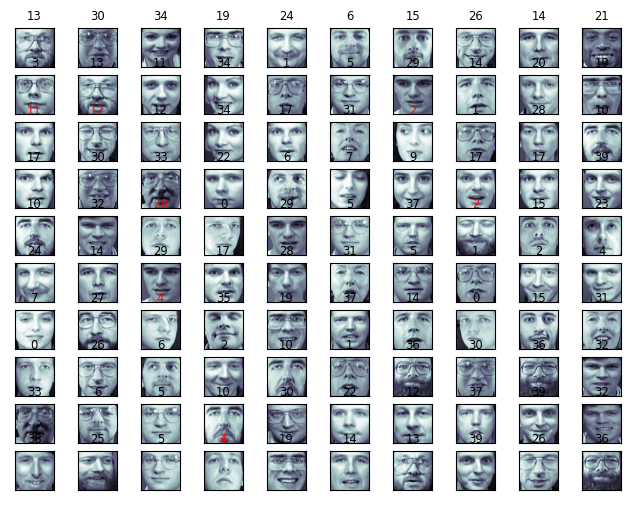

In [33]:
fig = plt.figure(figsize=(8, 6))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)


In [34]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [35]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [36]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


C:\Users\samue\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
